In [6]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

(4850, 7365, 3)


(35720250, 3)

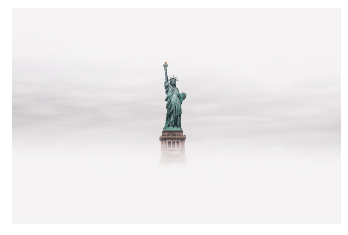

In [9]:
img = io.imread('images/Statue-of-Liberty.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);
print(img.shape)
img_data = (img / 255.0).reshape(-1, 3) # .reshape(-1, 3)
img_data.shape

# plot_utils class to plot the color space

In [10]:
class plot_utils:
    def __init__(self, img_data, title, num_pixels=10000, colors=None):
        self.img_data = img_data
        self.title = title
        self.num_pixels = num_pixels
        self.colors = colors

    def colorSpace(self):
        if self.colors is None:
            self.colors = self.img_data

        rand = np.random.RandomState(42)
        index = rand.permutation(self.img_data.shape[0])[:self.num_pixels]
        colors = self.colors[index]
        R, G, B = self.img_data[index].T
        fig, ax = plt.subplots(1, 2, figsize=(12,8))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        fig.suptitle(self.title, size=20)


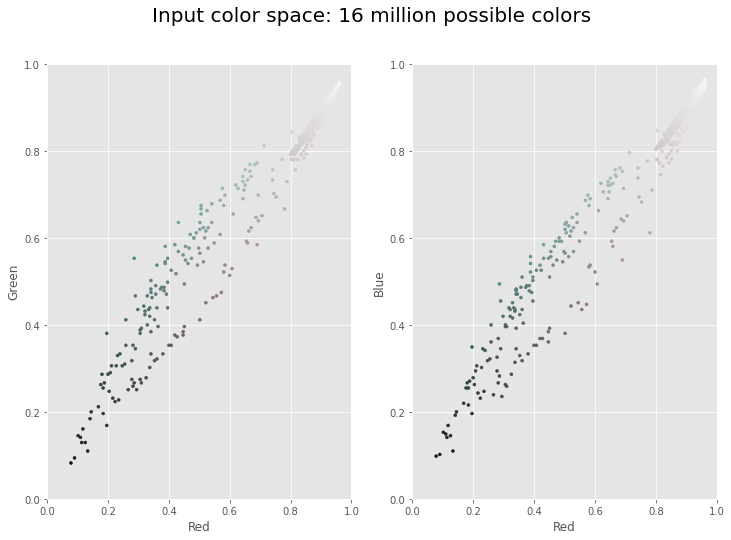

In [11]:
x = plot_utils(img_data, title='Input color space')
x.colorSpace()

# K-means clustering of image

In [ ]:
kmeans = MiniBatchKMeans(12).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors=k_colors, title="Reduced color space: 12 colors")
y.colorSpace()

# K-means with input as a jupyter widget

In [4]:
img_dir = 'images/'
@interact
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1,max=100,step=1,value=16,
                                                             continuous_update=False,
                                                             layout=dict(width='100%'))):
    
    input_img = io.imread(img_dir + image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)] 
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('K-means Image Compression', fontsize=20)
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()

interactive(children=(Dropdown(description='image', options=('Statue of Liberty.jpg',), value='Statue of Liber…